In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [211]:
sales = pd.read_csv("C:/Users/mohik/Downloads/perrin-freres-monthly-champagne-.csv").copy()
sales.head(10)

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
5,1964-06,3036.0
6,1964-07,2282.0
7,1964-08,2212.0
8,1964-09,2922.0
9,1964-10,4301.0


In [212]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Month                                                   106 non-null    object 
 1   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [213]:
sales.describe()

,Perrin Freres monthly champagne sales millions ?64-?72
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


In [214]:
sales.isna().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [215]:
sales.dropna(inplace= True)

In [216]:
sales.isna().sum()
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Month                                                   105 non-null    object 
 1   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [217]:
sales.rename(columns={'Perrin Freres monthly champagne sales millions ?64-?72':'Sales'}, inplace=True)
sales.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [218]:
sales['Month'] = pd.to_datetime(sales['Month'])
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   105 non-null    datetime64[ns]
 1   Sales   105 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB


### VISUALISING

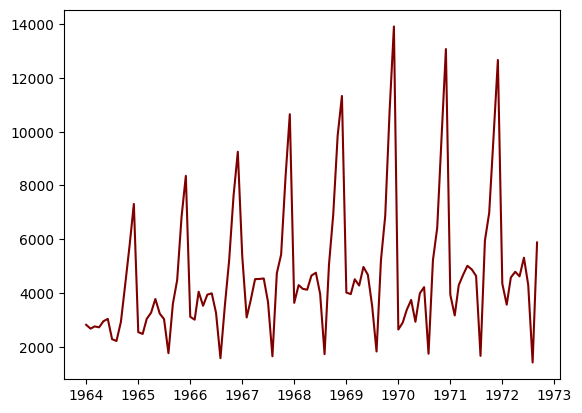

In [219]:
plt.plot(sales['Month'],sales['Sales'], color= 'Maroon')

### CHECKING STATIONARITY

In [220]:
from statsmodels.tsa.stattools import adfuller

In [221]:
result = adfuller(sales['Sales'])
print(f'ADF Statistic : {result[0]}')
print(f'p-value : {result[1]:.4f}')

if result[1]<= 0.05:
    print('The Series is Stationary')
else:
    print('The Series is Not Stationary')

ADF Statistic : -1.8335930563276195
p-value : 0.3639
The Series is Not Stationary


In [222]:
sales['Seasonal_Sales_diff']= sales['Sales'].diff(12)
result = adfuller(sales['Seasonal_Sales_diff'].dropna())
print(f'ADF Statistic : {result[0]}')
print(f'p-value : {result[1]:.4f}')

if result[1]<= 0.05:
    print('The Series is Stationary')
else:
    print('The Series is Not Stationary')

ADF Statistic : -7.626619157213166
p-value : 0.0000
The Series is Stationary


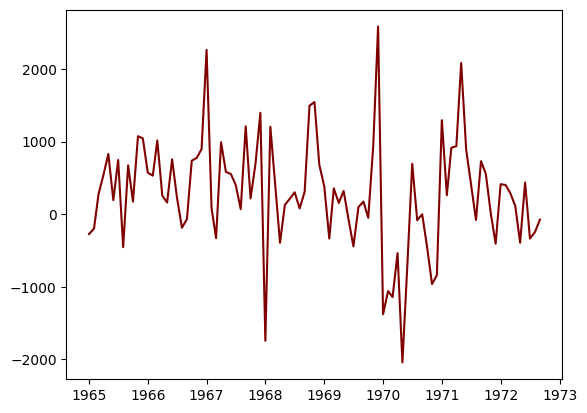

In [223]:
plt.plot(sales['Month'], sales['Seasonal_Sales_diff'], color='Maroon')

#### Confirming seasonal pattern occuring in 12 months

In [224]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Text(0.5, 1.0, 'PACF of Sales')

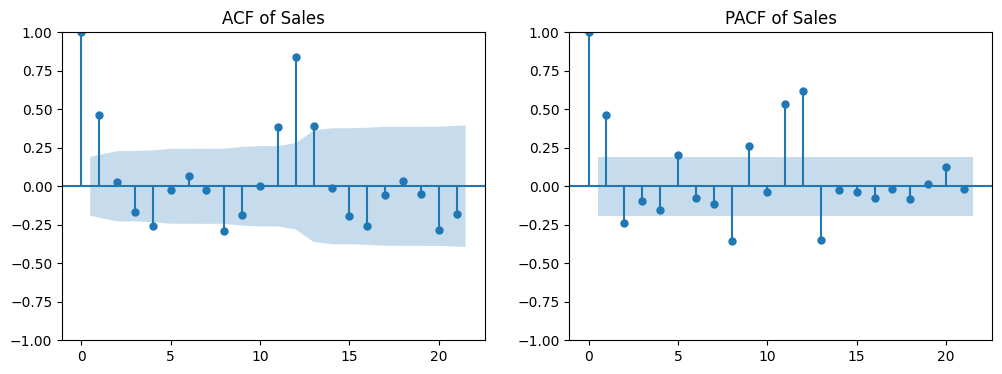

In [225]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
plot_acf(sales['Sales'].dropna(), ax= axes[0])
plot_pacf(sales['Sales'].dropna(), ax= axes[1])
axes[0].set_title('ACF of Sales')
axes[1].set_title('PACF of Sales')

There are spikes after 12 months. Hence yearly seasonality is present in the data

### Plotting ACF and PACF

Text(0.5, 1.0, 'PACF of Sales')

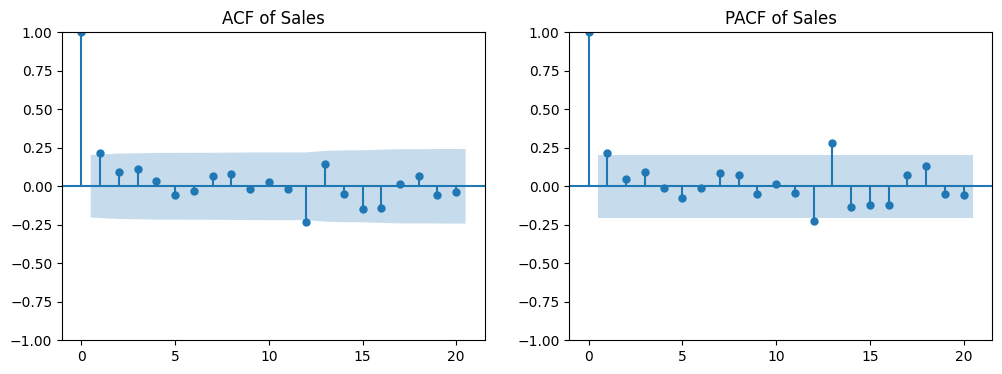

In [226]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
plot_acf(sales['Seasonal_Sales_diff'].dropna(), ax= axes[0])
plot_pacf(sales['Seasonal_Sales_diff'].dropna(), ax= axes[1])
axes[0].set_title('ACF of Sales')
axes[1].set_title('PACF of Sales')

### FITTING MODEL

In [227]:
sales.set_index('Month', inplace=True)


In [228]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [229]:
model1 = SARIMAX(sales['Sales'].dropna(),
                order=(1,1,1),
                seasonal_order=(1,1,1,12),
                enforce_invertibility=False,
                enforce_stationarity=False)
results = model1.fit()
print(results.summary())

c:\Users\mohik\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mohik\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                  105
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -627.562
Date:                            Sat, 24 May 2025   AIC                           1265.123
Time:                                    18:37:56   BIC                           1276.907
Sample:                                01-01-1964   HQIC                          1269.840
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2540      0.085      2.987      0.003       0.087       0.421
ma.L1         -0.9526      0.054   

In [230]:
# predicting sales
predict = results.predict()

# calculating RMSE
from sklearn.metrics import mean_squared_error
actual = sales['Sales']
rmse = np.sqrt(mean_squared_error(actual, predict))
print(f'Root Mean Squared Error : {rmse}')
print(f'AIC (1,1,1)(1,1,1,12):{results.aic}')

Root Mean Squared Error : 1014.0318882950402
AIC (1,1,1)(1,1,1,12):1265.1232995136045


#### Trying models with different p and q

In [231]:
model2 = SARIMAX(sales['Sales'],
                 order= (1,1,0),
                 seasonal_order= (1,1,0,12),
                 enforce_invertibility=False,
                 enforce_stationarity= False)

results2 = model2.fit()
results2.summary()

c:\Users\mohik\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mohik\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  105
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -645.727
Date:                            Sat, 24 May 2025   AIC                           1297.454
Time:                                    18:37:56   BIC                           1304.563
Sample:                                01-01-1964   HQIC                          1300.302
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3425      0.088     -3.913      0.000      -0.514      -0.171
ar.S.L12      -0.3287      0.086     -3.816      0.000      -0.498      -0.160
sigma2      7.497e+05   8.52e+04      8.797      0.000    5.83e+05    9.17e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.96   Jarque-Bera (JB):                45.65
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                            -1.05
Prob(H) (two-sided):                  0.03   Kurtosis:                         6.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [232]:
# predicting sales
predict2 = results2.predict()

# calculating RMSE
from sklearn.metrics import mean_squared_error
rmse2 = np.sqrt(mean_squared_error(actual, predict2))
print(f'Root Mean Squared Error : {rmse2:.4f}')
print(f'AIC (1,1,0)(1,1,0,12):{results2.aic:.4f}')

Root Mean Squared Error : 1087.0476
AIC (1,1,0)(1,1,0,12):1297.4543


In [233]:
model3 = SARIMAX(sales['Sales'],
                 order= (2,1,1),
                 seasonal_order= (2,1,1,12),
                 enforce_invertibility=False,
                 enforce_stationarity= False)

results3 = model3.fit()
results3.summary()

c:\Users\mohik\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mohik\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  105
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -529.636
Date:                            Sat, 24 May 2025   AIC                           1073.271
Time:                                    18:37:58   BIC                           1088.599
Sample:                                01-01-1964   HQIC                          1079.328
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2850      0.101      2.818      0.005       0.087       0.483
ar.L2          0.0187      0.106      0.177      0.859      -0.188       0.226
ma.L1         -0.9281      0.061    -15.268      0.000      -1.047      -0.809
ar.S.L12      -1.1026      0.080    -13.841      0.000      -1.259      -0.946
ar.S.L24      -0.2772      0.094     -2.936      0.003      -0.462      -0.092
ma.S.L12       1.0280      0.145      7.077      0.000       0.743       1.313
sigma2      4.175e+05   3.26e-07   1.28e+12      0.000    4.18e+05    4.18e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.59
Prob(Q):                              0.97   Prob(JB):                         0.04
Heteroskedasticity (H):               0.55   Skew:                            -0.33
Prob(H) (two-sided):                  0.17   Kurtosis:                         4.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.61e+27. Standard errors may be unstable.
"""

In [234]:
# predicting sales
predict3 = results3.predict()

# calculating RMSE
from sklearn.metrics import mean_squared_error
rmse3 = np.sqrt(mean_squared_error(actual, predict3))
print(f'Root Mean Squared Error : {rmse3:.4f}')
print(f'AIC (2,1,1)(2,1,1,12):{results3.aic:.4f}')

Root Mean Squared Error : 1089.0099
AIC (2,1,1)(2,1,1,12):1073.2713


In [235]:
model4 = SARIMAX(sales['Sales'],
                 order= (0,1,1),
                 seasonal_order= (0,1,1,12),
                 enforce_invertibility=False,
                 enforce_stationarity= False)

results4 = model4.fit()
results4.summary()

c:\Users\mohik\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mohik\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  105
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -629.765
Date:                            Sat, 24 May 2025   AIC                           1265.530
Time:                                    18:37:58   BIC                           1272.600
Sample:                                01-01-1964   HQIC                          1268.361
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9124      0.047    -19.257      0.000      -1.005      -0.820
ma.S.L12      -0.2463      0.091     -2.718      0.007      -0.424      -0.069
sigma2      5.994e+05   7.51e+04      7.984      0.000    4.52e+05    7.47e+05
===================================================================================
Ljung-Box (L1) (Q):                   3.59   Jarque-Bera (JB):                 5.39
Prob(Q):                              0.06   Prob(JB):                         0.07
Heteroskedasticity (H):               0.55   Skew:                             0.06
Prob(H) (two-sided):                  0.13   Kurtosis:                         4.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [236]:
# predicting sales
predict4 = results4.predict()

# calculating RMSE
from sklearn.metrics import mean_squared_error
rmse4 = np.sqrt(mean_squared_error(actual, predict4))
print(f'Root Mean Squared Error : {rmse4:.4f}')
print(f'AIC (0,1,1)(0,1,1,12):{results4.aic:.4f}')

Root Mean Squared Error : 1021.6343
AIC (0,1,1)(0,1,1,12):1265.5303


In [237]:
# Comparing all model's RMSE and AIC
print(f'Root Mean Squared Error : {rmse:.4f}')
print(f'AIC (1,1,1)(1,1,1,12):{results.aic:.4f}')
print('-'*50)
print(f'Root Mean Squared Error : {rmse2:.4f}')
print(f'AIC (1,1,0)(1,1,0,12):{results2.aic:.4f}')
print('-'*50)
print(f'Root Mean Squared Error : {rmse3:.4f}')
print(f'AIC (2,1,1)(2,1,1,12):{results3.aic:.4f}')
print('-'*50)
print(f'Root Mean Squared Error : {rmse4:.4f}')
print(f'AIC (0,1,1)(0,1,1,12):{results4.aic:.4f}')

Root Mean Squared Error : 1014.0319
AIC (1,1,1)(1,1,1,12):1265.1233
--------------------------------------------------
Root Mean Squared Error : 1087.0476
AIC (1,1,0)(1,1,0,12):1297.4543
--------------------------------------------------
Root Mean Squared Error : 1089.0099
AIC (2,1,1)(2,1,1,12):1073.2713
--------------------------------------------------
Root Mean Squared Error : 1021.6343
AIC (0,1,1)(0,1,1,12):1265.5303


Model selected is model 1 

### Running Diagonostics

#### Normality of residuals

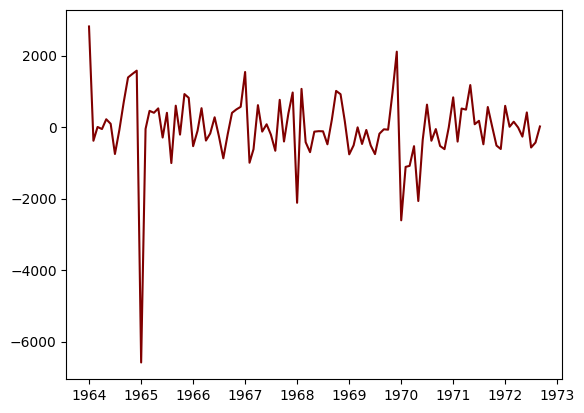

In [238]:
# plotting residuals
residuals = actual - predict
plt.plot(residuals, color= 'Maroon')

Text(0.5, 1.0, 'Histogram of Residuals')

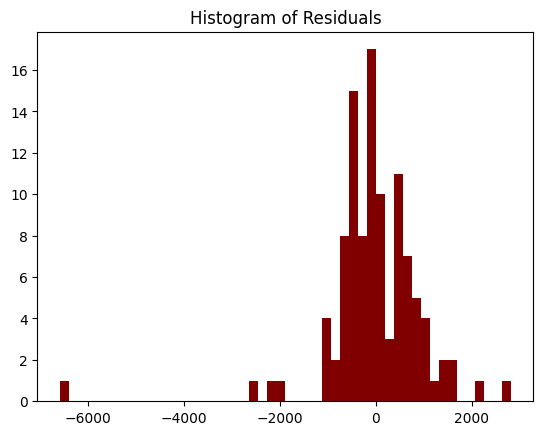

In [239]:
plt.hist(residuals, color = 'maroon', bins=50)
plt.title('Histogram of Residuals')

In [240]:
from statsmodels.stats.stattools import jarque_bera
stat, p, skew, kurt = jarque_bera(residuals)
print(f'Jarque- Bera: JB = {stat:.4f}')
print(f'P-value: {p:.4f}')
print(f'Skewness: {skew:.4f}')
print(f'Kurtosis: {kurt:.4f}')
print('-'*40)
if p<= 0.05:
    print(':( Residuals are Not Normally Distributed')
else:
    print(':) Residuals are Normally Distributed')

Jarque- Bera: JB = 1149.8670
P-value: 0.0000
Skewness: -2.4029
Kurtosis: 18.4832
----------------------------------------
:( Residuals are Not Normally Distributed


#### Residual Autocorrelation

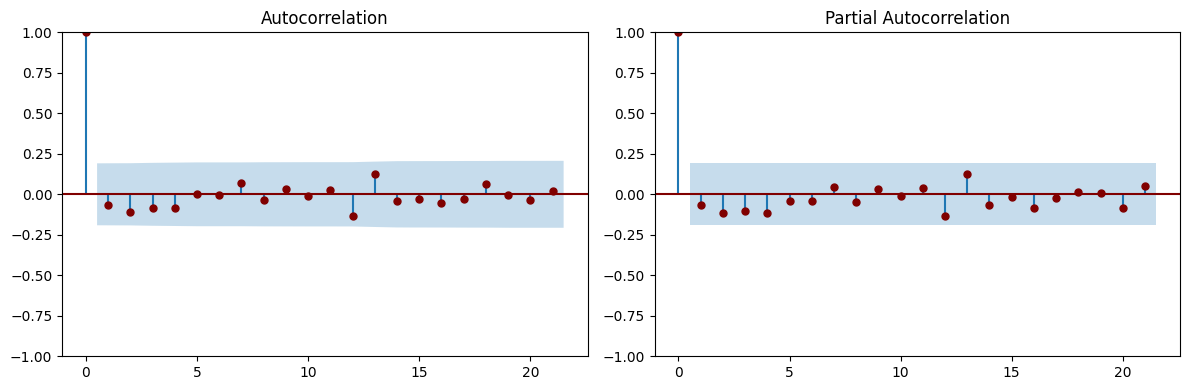

In [241]:
# plotting ACF and PACF of residuals
fig, axes = plt.subplots(1,2,  figsize= (12,4))
plot_acf(residuals, ax=axes[0], color= 'Maroon')
plot_pacf(residuals, ax=axes[1], color="Maroon")
plt.tight_layout()

Since most spikes are inside 95% confidence intervals, residuals look uncorrelated (white noise)

In [242]:
# Ljung-Box Test
# H0 : No Autocorrelation
# H1 : Autocorrelation exists

from statsmodels.stats.diagnostic import acorr_ljungbox
ljungbox_result = acorr_ljungbox(residuals, lags=[10,20,30], return_df= True)
ljungbox_result

,lb_stat,lb_pvalue
10,4.198338,0.937956
20,9.880689,0.970284
30,12.454878,0.998010


In [243]:
# To capture non-linear patterns doing a Turning Point test

from scipy.stats import norm

def turning_point_test(series):
    series = np.array(series)
    N= len(series)
    turning_points = 0

    for i in range(1, N-1):
        if(series[i-1]>series[i]< series[i+1]) or (series[i-1]<series[i]> series[i+1]):
            turning_points +=1
        
    expected = 2*(N-2)/3
    variance = (16 * N - 29) / 90
    z= (turning_points-expected)/np.sqrt(variance)
    p_value = 2*(1-norm.cdf(abs(z)))

    if p_value<= 0.05:
        print(':( Autocorrelation exists')
    else:
        print(":) Autocorrelation doesn't exist" )

    return{
        'Turning Points': turning_points,
        'Expected': expected,
        'Z-score': z,
        'p-value': p_value
          }
    

tpt = turning_point_test(residuals)
tpt


:) Autocorrelation doesn't exist


{'Turning Points': 67,
 'Expected': 68.66666666666667,
 'Z-score': np.float64(-0.38913157128384906),
 'p-value': np.float64(0.6971788198820628)}

No Autocorrelation exists

####  Testing Homoskedasticity

In [244]:
# doing ARCH test
# H0: Residuals are homoscedastic
# H1: Residuals are heteroscedastic

from statsmodels.stats.diagnostic import het_arch
arch_test = het_arch(residuals, nlags= 10)

print(f'LM Statistic: {arch_test[0]:.4f}')
print(f'p-value : {arch_test[1]:.4f}')
print('-'*40)
 
if arch_test[1] <= 0.05:
    print(':( Residuals are heteroscedastic')
else:
    print(':) Residuals are homoscedastic')

LM Statistic: 0.6461
p-value : 1.0000
----------------------------------------
:) Residuals are homoscedastic


### FORECASTING

<Axes: xlabel='Month'>

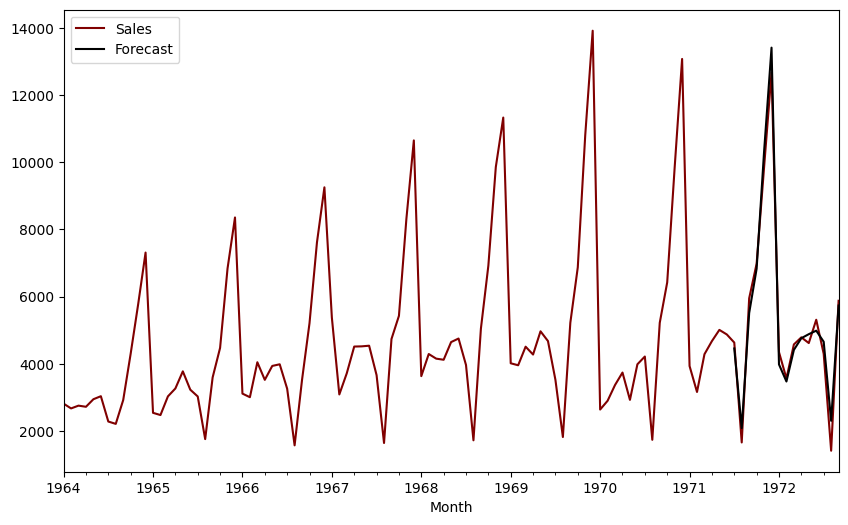

In [256]:
sales['Forecast'] = results.predict(start= 90, end= 105, dynamic=True)
sales[['Sales','Forecast']].plot(figsize=(10,6), color=['maroon','black'])

C:\Users\mohik\AppData\Local\Temp\ipykernel_20464\2493365457.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  extended_sales = pd.concat([sales, future_df])


Text(0.5, 1.0, 'Sales of Next 24 Months')

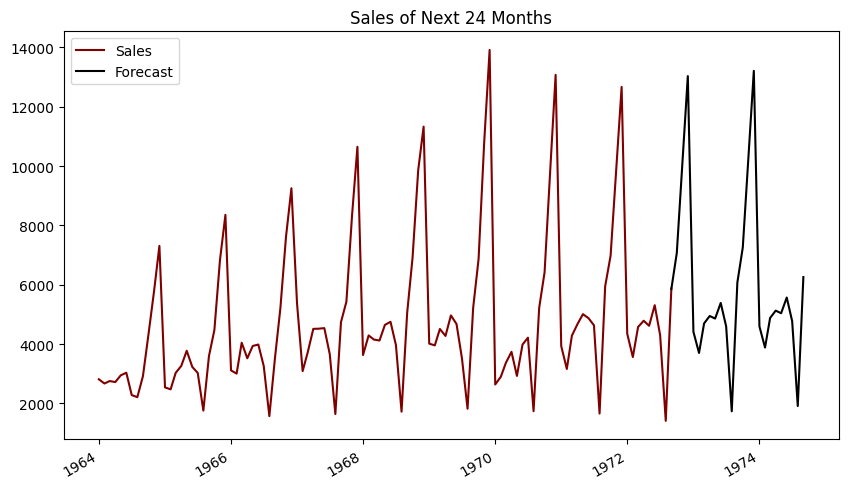

In [268]:
# Generating future dates
from pandas.tseries.offsets import DateOffset
future_dates = [sales.index[-1] + DateOffset(months= x) for x in range(0,25)]
future_df = pd.DataFrame(index= future_dates, columns= sales.columns)

extended_sales = pd.concat([sales, future_df])
start_date = len(sales) -1
end_date = len(sales) + 23
extended_sales['Forecast'] = results.predict(start = start_date, end = end_date, dynamic = True)
extended_sales[['Sales','Forecast']].plot(figsize=(10,6), color = ['maroon', 'black'])
plt.title('Sales of Next 24 Months', color='black' )